# Assignment 2: Privacy-Preserving Data Sharing
### Security and Privacy Project - MECD (2022/2023)

### Autores

- Duarte Meneses - 2019216949
- Patricia Costa - 2019213995

## Preparation of the new dataset for the anonymization with ARX

In [13]:
import os
import pandas as pd

fich = 'infringement_dataset_v2.csv'

new_fich = 'dataset.csv'

df = pd.read_csv(fich)

df['name'] = df['first_name'] + ' ' + df['last_name']

df = df.drop(columns=['car_age', 'days_employed', 'has_own_car', 'has_own_realty', 'housing_type', 'mobilephone_reachable', 
                        'num_children', 'num_family_members', 'num_req_bureau_day', 'num_req_bureau_hour',
                        'num_req_bureau_month', 'num_req_bureau_qrt', 'num_req_bureau_week', 'num_req_bureau_year', 'occupation_type',
                        'provided_email', 'provided_homephone', 'provided_mobilephone', 'provided_workphone', 'region_rating', 
                        'score_ext_1', 'score_ext_2', 'score_ext_3', 'first_name', 'last_name'
])
display(df.isna().sum())

df.fillna(value = -1,  
          inplace = True) 

display(df.isna().sum())

df.to_csv(new_fich, index=False)


loan_id                         0
infringed                       0
contract_type                   0
gender                          0
annual_income                   0
credit_amount                   0
credit_annuity                 12
goods_valuation               278
income_type                     0
education                       0
family_status                   0
age                             0
organization_type               0
past_avg_amount_annuity     16871
past_avg_amt_application    16454
past_avg_amt_credit         16454
past_loans_approved         16454
past_loans_refused          16454
past_loans_canceled         16454
past_loans_unused           16454
past_loans_total            16454
name                            0
dtype: int64

loan_id                     0
infringed                   0
contract_type               0
gender                      0
annual_income               0
credit_amount               0
credit_annuity              0
goods_valuation             0
income_type                 0
education                   0
family_status               0
age                         0
organization_type           0
past_avg_amount_annuity     0
past_avg_amt_application    0
past_avg_amt_credit         0
past_loans_approved         0
past_loans_refused          0
past_loans_canceled         0
past_loans_unused           0
past_loans_total            0
name                        0
dtype: int64

## Analysis with the anonymized dataset with ARX

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

anonymized = pd.read_csv('data/data_anonymized.csv')
display(anonymized)

,loan_id,infringed,contract_type,gender,annual_income,credit_amount,credit_annuity,goods_valuation,income_type,education,...,organization_type,past_avg_amount_annuity,past_avg_amt_application,past_avg_amt_credit,past_loans_approved,past_loans_refused,past_loans_canceled,past_loans_unused,past_loans_total,name
0,*,0,Cash loans,F,"[25000.0, 480000.0[",225000.0,21168.0,225000.0,Commercial associate,Higher education,...,*******************,-1.0000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,*
1,*,0,Cash loans,F,"[25000.0, 480000.0[",504000.0,33205.5,504000.0,Commercial associate,Incomplete higher,...,*******************,7080.2100,50805.000,58225.500,1.0,0.0,0.0,0.0,1.0,*
2,*,0,Revolving loans,F,"[25000.0, 480000.0[",180000.0,9000.0,180000.0,Commercial associate,Secondary / secondary special,...,*******************,9325.5300,83695.500,92533.500,1.0,0.0,0.0,0.0,1.0,*
3,*,0,Revolving loans,F,"[25000.0, 480000.0[",180000.0,9000.0,180000.0,Commercial associate,Incomplete higher,...,*******************,9027.1500,80755.500,80635.500,3.0,0.0,0.0,0.0,3.0,*
4,*,0,Cash loans,F,"[25000.0, 480000.0[",152820.0,7893.0,135000.0,Commercial associate,Incomplete higher,...,*******************,2773.5750,33705.000,33705.000,1.0,0.0,0.0,0.0,1.0,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,*,0,Revolving loans,*,*,900000.0,45000.0,900000.0,*,Higher education,...,*,-1.0000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,*
307507,*,0,Cash loans,*,*,454500.0,13288.5,454500.0,*,Secondary / secondary special,...,*,5785.4925,48777.750,28640.250,2.0,0.0,0.0,0.0,2.0,*
307508,*,0,Cash loans,*,*,808650.0,26086.5,675000.0,*,Secondary / secondary special,...,*,6012.8250,69192.000,69192.000,3.0,0.0,0.0,0.0,3.0,*
307509,*,0,Cash loans,*,*,67765.5,7794.0,58500.0,*,Secondary / secondary special,...,*,4475.8440,25499.268,47898.900,5.0,0.0,0.0,0.0,5.0,*


,past_avg_amount_annuity,past_avg_amt_application,past_avg_amt_credit,past_loans_total
age,,,,
*,20840.585781,241433.796418,259308.521852,4.063568
"[20, 30[",11213.842559,104768.965305,112679.372452,3.940139
"[30, 40[",13045.107180,131817.678940,147155.947012,4.462573
"[40, 50[",14506.447755,157058.190137,175624.493256,4.652399
"[50, 60[",15013.414563,168752.756541,187150.047616,4.628265
"[60, 70[",14040.541300,156657.187888,167280.757854,5.128289


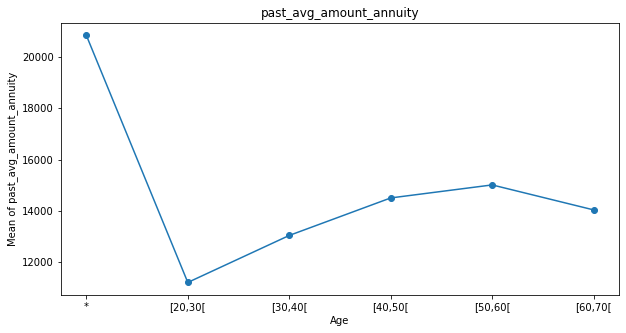

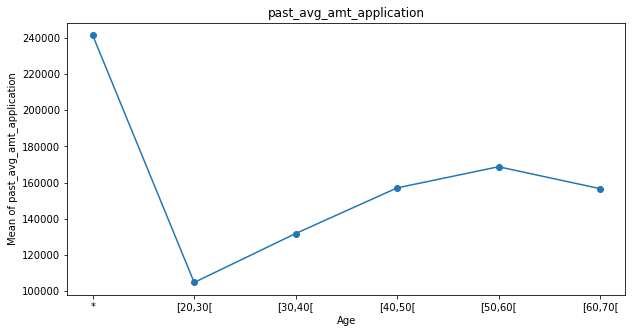

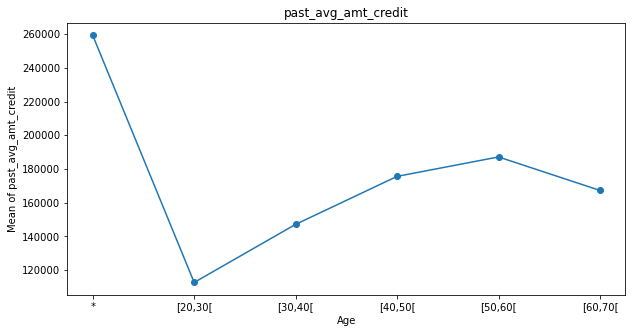

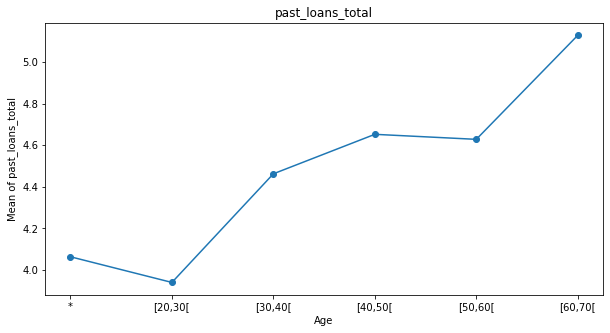

In [8]:
from matplotlib import pyplot as plt

columns = ['age', 'past_avg_amount_annuity', 'past_avg_amt_application', 'past_avg_amt_credit', 'past_loans_total']
colunas = anonymized[columns]
groupby_age_original = colunas.groupby("age").mean()
display(groupby_age_original)

def plot(column, x, y):   
    plt.figure(figsize=(10,5))
    plt.title(column)
    plt.xlabel("Age")
    plt.ylabel("Mean of " + column)
    plt.plot(x, y)
    plt.scatter(x, y)

x = ['*', '[20,30[', '[30,40[', '[40,50[', '[50,60[', '[60,70[']
plot('past_avg_amount_annuity', x, groupby_age_original['past_avg_amount_annuity'])
plot('past_avg_amt_application', x, groupby_age_original['past_avg_amt_application'])
plot('past_avg_amt_credit', x, groupby_age_original['past_avg_amt_credit'])
plot('past_loans_total', x, groupby_age_original['past_loans_total'])

<AxesSubplot:title={'center':'Percentagem de clientes com determinada idade com empréstimos em incumprimento'}, xlabel='age', ylabel='Percentagem de empréstimos em incumprimento'>

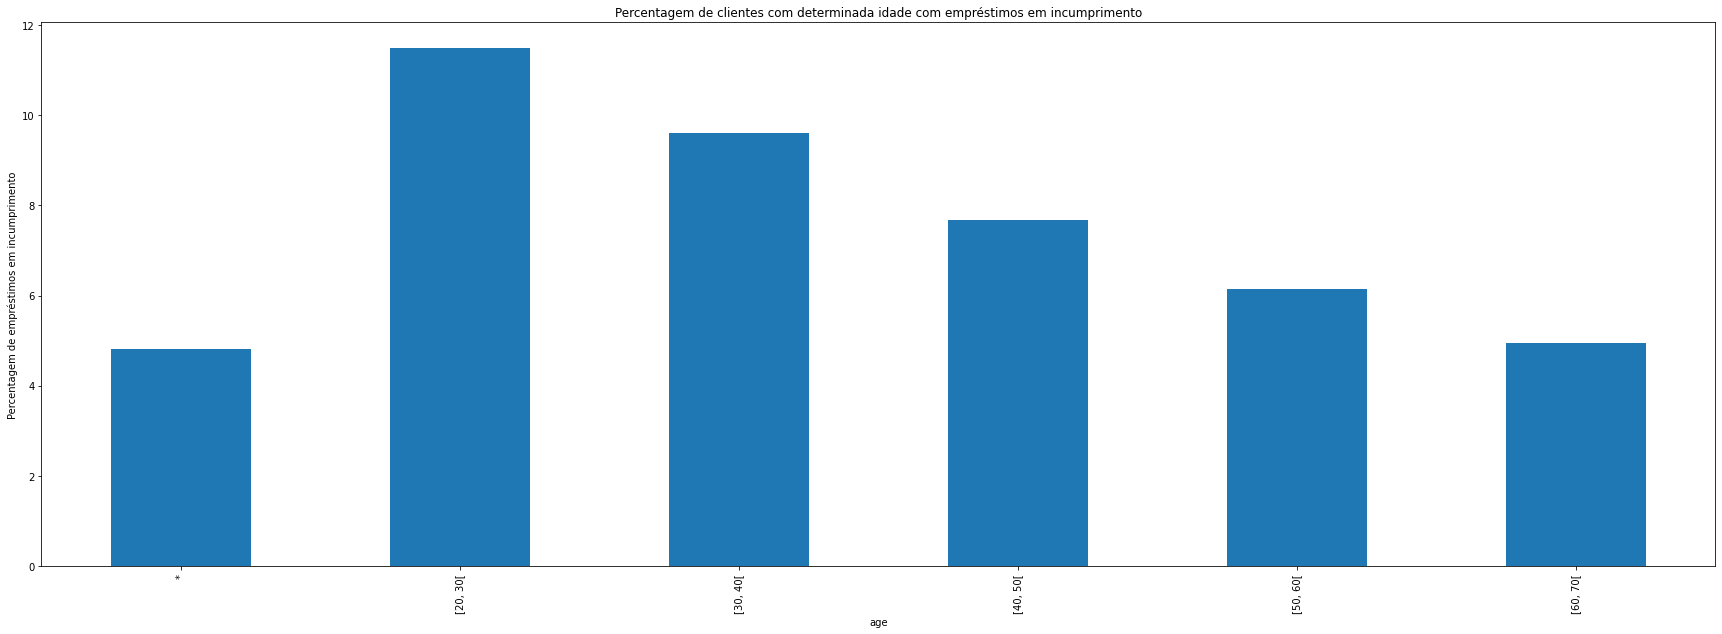

In [ ]:
count_inf = anonymized[anonymized['infringed']==1.0].groupby(['age']).size()

age = anonymized.groupby(['age']).size()


plt.title("Percentagem de clientes com determinada idade com empréstimos em incumprimento")
plt.xlabel("Idade dos clientes")
plt.ylabel("Percentagem de empréstimos em incumprimento")

((count_inf/age)*100).plot(figsize=(30,10), kind='bar')